In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2

In [2]:
pkgo=pd.read_csv('./train.csv')

In [3]:
pkgo['order'] = pkgo.index

In [4]:
pkgo.head(10)

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,order
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,...,False,False,False,False,False,False,False,False,2,0
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.1,...,False,False,False,False,False,False,False,False,5,1
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.7,...,False,False,False,False,False,False,False,False,3,2
3,MTU2OTA5MTcyMDMzOTc0NzczODk=,morning,11,10,0,True,Hobart,Australia,Clear,12.7,...,False,False,False,False,False,False,False,False,4,3
4,NTE2OTkxNjE3OTUzODY0MTE4MQ==,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.1,...,False,False,False,False,False,False,False,False,3,4
5,NDIxMTM5NjUwODY2MzMxNTQwNQ==,afternoon,13,7,13,False,Kuching,Asia,Clear,25.0,...,False,False,False,False,False,False,False,False,2,5
6,MTQyMzc1MTk5OTQ5NTU0NDYzOTc=,night,4,1,14,False,Mexico_City,America,Clear,26.7,...,False,False,False,False,False,False,False,False,5,6
7,NDIxODg3ODg5MTc0MjA0MDQ0NQ==,afternoon,15,19,0,True,New_York,America,Clear,29.7,...,False,False,False,False,False,False,False,False,5,7
8,MTQyNTE3NTc3NzU4MjYzNDM5MTc=,night,22,18,13,False,Chicago,America,PartlyCloudy,26.2,...,False,False,False,False,False,False,False,False,0,8
9,MTA0MjI1MTc0MjEzMzcyMzM0Mzc=,afternoon,15,36,0,True,New_York,America,PartlyCloudy,28.1,...,False,False,False,False,False,False,False,False,3,9


In [5]:
city_list=pd.read_csv('./city.csv')

In [6]:
city_list

,city,lat,lng
0,Adelaide,-35.348970,138.442130
1,Amsterdam,52.278174,4.728759
2,Athens,37.948818,23.686986
3,Auckland,-37.590199,174.443816
4,Bahia,32.771021,-117.248031
...,...,...,...
70,Vienna,48.118270,16.182620
71,Vilnius,54.568825,25.245791
72,Warsaw,52.978767,20.851290
73,Zagreb,45.740853,15.821690


In [7]:
pkgo = pd.merge(pkgo, city_list, how="inner", on=["city", "city"])

In [8]:
pkgo = pkgo.sort_values(by=['order'])

In [9]:
pkgo

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,order,lat,lng
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,...,False,False,False,False,False,False,2,0,13.494088,100.327814
96,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.1,...,False,False,False,False,False,False,5,1,40.477399,-74.259090
97,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.7,...,False,False,False,False,False,False,3,2,40.477399,-74.259090
1483,MTU2OTA5MTcyMDMzOTc0NzczODk=,morning,11,10,0,True,Hobart,Australia,Clear,12.7,...,False,False,False,False,False,False,4,3,-42.891635,147.315610
1491,NTE2OTkxNjE3OTUzODY0MTE4MQ==,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.1,...,False,False,False,False,False,False,3,4,33.703652,-118.668176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,MzQyOTQzNjIwNzY0NzY2NTE2NQ==,morning,10,21,10,False,Denver,America,Clear,14.3,...,False,False,False,False,False,False,4,7155,39.614431,-105.109927
5656,NzQ4MDg5NDU5NzUyMjc4MzEwMQ==,afternoon,13,9,12,True,Paris,Europe,Overcast,21.5,...,False,False,False,False,False,False,4,7156,48.815573,2.224199
5657,NTk3OTQyMDIwOTIwNzkyNjM5Nw==,afternoon,15,53,12,True,Paris,Europe,Overcast,19.9,...,False,False,False,False,False,False,4,7157,48.815573,2.224199
2372,MTM2MjI1Mzk5MTIyOTQxNzQ2MjE=,night,0,28,7,False,Los_Angeles,America,Clear,24.6,...,False,False,False,False,False,False,0,7158,33.703652,-118.668176


In [10]:
pkgo_test=pd.read_csv('./test.csv')

In [11]:
test_id = pkgo_test.id

In [12]:
pkgo_test['order'] = pkgo_test.index

In [13]:
pkgo_test.head(10)

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,order
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,...,False,False,False,False,False,False,False,False,False,0
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,...,False,False,False,False,True,False,False,False,False,1
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,...,False,False,False,False,False,False,False,False,False,2
3,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,morning,7,38,13,True,London,Europe,MostlyCloudy,18.5,...,False,False,False,False,False,False,False,False,False,3
4,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,night,1,27,12,False,Chicago,America,Clear,20.2,...,False,False,False,False,False,False,False,False,False,4
5,MTkwNTk1MzkyNzkwNjQ3MDUyNQ==,night,4,28,1,True,New_York,America,Clear,18.5,...,False,False,False,False,False,False,False,False,False,5
6,MTU4NzAwMDQyODIwMTM2MDEyMjk=,morning,9,31,0,True,Los_Angeles,America,Clear,13.7,...,False,False,False,False,False,False,False,False,False,6
7,ODY5MDY1ODA4Njk5MjAwODI5,afternoon,12,2,0,True,Chicago,America,Clear,26.6,...,False,False,False,False,False,False,False,False,False,7
8,MjA2MzcwMzk1Mzg2MTQ0NDMwMQ==,afternoon,14,2,12,False,Rome,Europe,MostlyCloudy,23.6,...,False,False,False,False,False,False,False,False,False,8
9,NjcwNDcxODcwMTUxODQxNDE=,night,20,56,0,True,New_York,America,PartlyCloudy,26.0,...,False,False,False,False,False,False,False,False,False,9


In [14]:
pkgo_test = pd.merge(pkgo_test, city_list, how="inner", on=["city", "city"])

In [15]:
pkgo_test = pkgo_test.sort_values(by=['order'])

In [16]:
pkgo_test

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,order,lat,lng
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,...,False,False,False,False,False,False,False,0,45.990033,14.419502
13,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,...,False,False,True,False,False,False,False,1,33.703652,-118.668176
229,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,...,False,False,False,False,False,False,False,2,40.477399,-74.259090
566,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,morning,7,38,13,True,London,Europe,MostlyCloudy,18.5,...,False,False,False,False,False,False,False,3,51.384940,0.351468
705,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,night,1,27,12,False,Chicago,America,Clear,20.2,...,False,False,False,False,False,False,False,4,41.644335,-87.940267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,MTA5MTg5MTI0Mjc0NDU0NDY3ODE=,night,23,52,14,False,Mexico_City,America,Clear,27.1,...,False,False,False,False,False,False,False,1786,19.188710,-99.326777
1470,MTgzODA5ODc2NDU1MDkxOTM4ODU=,morning,7,43,13,False,Oslo,Europe,Clear,8.5,...,False,False,False,False,False,False,False,1787,59.809675,10.622569
1530,NzA4MTU3NDkyMzYwMzM2NzA2OQ==,morning,11,15,0,True,Madrid,Europe,Clear,31.7,...,False,False,False,False,False,False,False,1788,40.312064,-3.834162
704,MjM5NzA0NzA4Nzc5MTUxNDcxNw==,afternoon,15,19,12,False,London,Europe,PartlyCloudy,23.1,...,False,False,False,False,False,False,False,1789,51.384940,0.351468


In [17]:
frames = [pkgo, pkgo_test.rename(columns={"id": "ID"})]
pkgo = pd.concat(frames)

In [18]:
pkgo['appearedTime'] = pkgo['appearedHour']+(pkgo['appearedMinute']/60)
pkgo['appearedTime_sin'] = np.sin(2 * np.pi * pkgo['appearedTime']/24)
pkgo['appearedTime_cos'] = np.cos(2 * np.pi * pkgo['appearedTime']/24)

In [19]:
# 使用該city的population_density平均值取代0值
for i in pkgo['city'].unique():
    mean=pkgo[pkgo['city']==i].loc[:,'population_density'].mean()
    pkgo.loc[(pkgo['city']==i) & (pkgo['population_density']==0),'population_density']=mean

In [20]:
print('before set options :',pd.get_option('display.max_columns'))

#自定義選項，使columns能夠全盤顯示
pd.set_option('display.max_columns',pkgo.shape[1])
print('after set options :',pd.get_option('display.max_columns'))
pkgo.head(1)

before set options : 20
after set options : 190


,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,order,lat,lng,appearedTime,appearedTime_sin,appearedTime_cos
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.0,1008.96,clear-day,6019.0444,True,True,True,False,0.523759,False,False,False,True,True,True,0.14412,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,0,13.494088,100.327814,19.166667,-0.953717,0.300706


In [21]:
pkgo.columns.values

array(['ID', 'appearedTimeOfDay', 'appearedHour', 'appearedMinute',
       'terrainType', 'closeToWater', 'city', 'continent', 'weather',
       'temperature', 'windSpeed', 'pressure', 'weatherIcon',
       'population_density', 'urban', 'suburban', 'midurban', 'rural',
       'gymDistanceKm', 'gymIn100m', 'gymIn250m', 'gymIn500m',
       'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopDistanceKm',
       'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m',
       'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1',
       'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7',
       'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13',
       'cooc_14', 'cooc_15', 'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19',
       'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25',
       'cooc_26', 'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31',
       'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36', 'cooc_37',
       'cooc_38', 'cooc_39', '

In [22]:
y = to_categorical(pkgo['class'][:7160])
y[0:10]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [23]:
pkgo = pkgo.drop(['ID', 'class', 'order', 'appearedHour', 'appearedMinute','appearedTime'], axis=1)

In [24]:
# num_cols = pkgo.shape[1]
# pkgo = pd.concat([pkgo.iloc[:, 1:num_cols-4], pkgo.iloc[:,num_cols-2:]], axis=1, ignore_index=True)

In [25]:
pkgo

,appearedTimeOfDay,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,lat,lng,appearedTime_sin,appearedTime_cos
0,evening,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.044400,True,True,True,False,0.523759,False,False,False,True,True,True,0.144120,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,13.494088,100.327814,-0.953717,0.300706
96,night,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,1172.145760,False,False,False,True,0.565267,False,False,False,True,True,True,0.198728,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,40.477399,-74.259090,0.984041,0.177944
97,evening,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,1172.145760,False,False,False,Tr

In [26]:
# #data.terrainType = data.terrainType.astype( str )
# features_to_str=["terrainType"]
# pkgo[features_to_str]=pkgo[features_to_str].astype(str)
# data.info()

In [27]:
pkgo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8951 entries, 0 to 1040
Columns: 184 entries, appearedTimeOfDay to appearedTime_cos
dtypes: bool(168), float64(10), int64(1), object(5)
memory usage: 2.6+ MB


In [28]:
pkgo.describe()

,terrainType,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm,lat,lng,appearedTime_sin,appearedTime_cos
count,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000
mean,9.720590,23.281008,7.510169,1014.904328,1786.441753,2.987937,0.562947,37.216791,-37.936631,0.088253,0.068640
std,4.941831,6.054764,4.617323,5.828866,2143.401196,46.908371,7.479374,16.279642,72.724768,0.705483,0.699931
min,0.000000,4.800000,0.000000,996.330000,0.000000,0.004516,0.000319,-42.891635,-157.949443,-1.000000,-1.000000
25%,7.000000,18.500000,3.920000,1010.695000,458.582340,0.178437,0.050817,33.703652,-87.940267,-0.632705,-0.625923
50%,13.000000,23.800000,6.630000,1015.290000,1135.319600,0.314365,0.132209,40.477399,-74.259090,0.165048,0.143493
75%,13.000000,27.500000,10.010000,1019.290000,2261.157000,0.577406,0.310317,43.581024,10.622569,0.803857,0.743145
max,16.000000,41.200000,56.130000,1034.170000,10000.000000,3859.424664,455.313099,59.922489,174.443816,1.000000,1.000000


In [29]:
le = preprocessing.LabelEncoder()
def trans(pkgo):

    for i in pkgo.columns.values:
            if pkgo[i].dtypes==object:
                le.fit(pkgo[i].unique())
                pkgo[i] = le.transform(pkgo[i].values)
                #pkgo[i] = to_categorical(pkgo[i])
                set(pkgo[i])
            elif pkgo[i].dtypes==bool:
                pkgo[i] = pkgo[i].astype(int)
#             elif pkgo[i].dtypes==float:
#                 scaler = MinMaxScaler()
#                 pkgo[i] = scaler.fit_transform(pkgo[i].values.reshape(-1, 1))
#             elif pkgo[i].dtypes==int:
#                 scaler = MinMaxScaler()
#                 pkgo[i] = scaler.fit_transform(pkgo[i].values.reshape(-1, 1))
    numlist = ['gymDistanceKm', 'pokestopDistanceKm',
              'population_density', 'pressure', 'temperature',
              'windSpeed']
    othlist = ['lat', 'lng']
    for i in numlist:
        scaler = MinMaxScaler()
        pkgo[i] = scaler.fit_transform(pkgo[i].values.reshape(-1, 1))
    for i in othlist:
        pkgo[i] = preprocessing.scale(pkgo[i])
    
    return

In [30]:
trans(pkgo)
pkgo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8951 entries, 0 to 1040
Columns: 184 entries, appearedTimeOfDay to appearedTime_cos
dtypes: float64(10), int64(174)
memory usage: 12.6 MB


In [31]:
pkgo

,appearedTimeOfDay,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,lat,lng,appearedTime_sin,appearedTime_cos
0,1,13,0,5,5,4,0.631868,0.160342,0.333774,0,0.601904,1,1,1,0,0.000135,0,0,0,1,1,1,0.000316,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.457282,1.901308,-0.953717,0.300706
96,3,13,1,47,1,4,0.585165,0.154997,0.598044,1,0.117215,0,0,0,1,0.000145,0,0,0,1,1,1,0.000436,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.200299,-0.499479,0.984041,0.177944
97,1,0,1,47,1,4,0.546703,0.299662,0.710624,0,0.117215,0,0,0,1,0.000049,0,1,1,1,1,1,0.000154,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.200299,-0.499479,-0.894934,0.446198
1483,2,0,1,26,6,4,0.217033,0.236059,0.471987,1,0.012890,0,0,0,1,0.000048,0,1,1,1,1,1,0.000008,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4.921048,2.547448,0.216440,-0.976296
1491,1,13,1,38,1,19,0.392857,0.102975,0.397199,4,0.418839,1,1,1,0,0.000016,1,1,1,1,1,1,0.000157,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.215812,-1.110159,-0.990268,0.139173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [66]:
from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [0, 5, 6, 7, 11])
onehotencoder = OneHotEncoder(categorical_features = [0, 1, 3, 177, 179, 180])
# onehotencoder = OneHotEncoder(categorical_features = ['appearedTimeOfDay', 'city',
#                                                       'continent', 'terrainType',
#                                                       'weather', 'weatherIcon'])
data_str_ohe=onehotencoder.fit_transform(pkgo).toarray()
pkgo = pd.DataFrame(data_str_ohe)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [67]:
pkgo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,...,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000135,1.0,0.0,1.0,0.0,1.0,0.0,-1.457282,1.901308,1.0,0.000316,1.0,0.0,1.0,1.0,1.0,1.0,0.601904,0.333774,0.0,1.0,0.631868,1.0,0.160342,-0.953717,0.300706
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000145,1.0,0.0,1.0,0.0,1.0,0.0,0.200299,-0.499479,0.0,0.000436,1.0,0.0,1.0,1.0,1.0,1.0,0.117215,0.598044,1.0,0.0,0.585165,0.0,0.154997,0.984041,0.177944
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000049,1.0,0.0,1.0,1.0,1.0,1.0,0.200299,-0.499479,0.0,0.000154,1.0,1.0,1.0,1.0,1.0,1.0,0.117215,0.710624,1.0,0.0,0.546703,0.0,0.299662,-0.894934,0.446198
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000048,1.0,0.0,1.0,1.0,1.0,1.0,-4.921048,2.547448,0.0,0.000008,1.0,1.0,1.0,1.0,1.0,1.0,0.012890,0.471987,1.0,0.0,0.217033,0.0,0.236059,0.216440,-0.976296
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [68]:
pkgo[:7160].shape

(7160, 313)

In [69]:
pkgo[7160:].shape

(1791, 313)

In [70]:
pkgo_test = pkgo[7160:]

In [71]:
x=pkgo[:7160]
x.shape, y.shape

((7160, 313), (7160, 6))

In [72]:
import os
eda_path = os.path.join(os.getcwd(), 'eda')
if not os.path.isdir(eda_path):
    os.makedirs(eda_path)
train_data_eda_file=os.path.join(eda_path,  "train_data_eda.csv")
train_label_eda_file=os.path.join(eda_path,  "train_label_eda.csv")
test_data_eda_file=os.path.join(eda_path,  "test_data_eda.csv")

In [73]:
#儲存結果
train_data_eda = pd.DataFrame(x)
train_data_eda.to_csv(train_data_eda_file, index=False)
train_label_eda = pd.DataFrame(y.astype(int))
train_label_eda.to_csv(train_label_eda_file, index=False)
#test_data_eda = pd.DataFrame(x_test)
test_data_eda = pd.concat([test_id, pkgo_test], axis=1) # 把id祖回去，後續predict時會用到
test_data_eda.to_csv(test_data_eda_file, index=False)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state = 92023)

print(f'Training set--> X_train shape= {X_train.shape}, y_train shape= {y_train.shape}')
print(f'Holdout set--> X_test shape= {X_test.shape}, y_test shape= {y_test.shape}')

Training set--> X_train shape= (6086, 313), y_train shape= (6086, 6)
Holdout set--> X_test shape= (1074, 313), y_test shape= (1074, 6)


In [148]:
model = keras.Sequential()

model.add(layers.Dense(200, input_dim=X_train.shape[1],activation='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0)))

model.add(layers.Dense(100,activation='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0)))

model.add(layers.Dense(6,activation='softmax',kernel_regularizer=l1_l2(l1=0.001, l2=0)))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 200)               62800     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_41 (Dense)             (None, 6)                 606       
Total params: 83,506
Trainable params: 83,506
Non-trainable params: 0
_________________________________________________________________


In [149]:
from keras.callbacks import EarlyStopping

# 建EarlyStopping，monitor以val_loss為主，經過五次patience，verbose=1：信息展示
early_stopping = EarlyStopping(monitor = 'val_loss', 
                 patience = 60, 
                 verbose = 1)

In [150]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
              metrics=['acc'])
batch_size = 128
epochs = 300
model_history \
    = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=False,
                validation_split=0.15,
                callbacks=[early_stopping])

Train on 5173 samples, validate on 913 samples
Epoch 1/300
5173/5173 [==============================] - 0s 76us/sample - loss: 5.3393 - acc: 0.3584 - val_loss: 4.0781 - val_acc: 0.4589
Epoch 2/300
5173/5173 [==============================] - 0s 29us/sample - loss: 3.2806 - acc: 0.4837 - val_loss: 2.5894 - val_acc: 0.5005
Epoch 3/300
5173/5173 [==============================] - 0s 33us/sample - loss: 2.2785 - acc: 0.5136 - val_loss: 2.0418 - val_acc: 0.5104
Epoch 4/300
5173/5173 [==============================] - 0s 39us/sample - loss: 1.9536 - acc: 0.5241 - val_loss: 1.8577 - val_acc: 0.5192
Epoch 5/300
5173/5173 [==============================] - 0s 41us/sample - loss: 1.8172 - acc: 0.5304 - val_loss: 1.7579 - val_acc: 0.5279
Epoch 6/300
5173/5173 [==============================] - 0s 42us/sample - loss: 1.7347 - acc: 0.5337 - val_loss: 1.6915 - val_acc: 0.5279
Epoch 7/300
5173/5173 [==============================] - 0s 29us/sample - loss: 1.6770 - acc: 0.5349 - val_loss: 1.6419 - val

In [151]:
#evaluate model
pred = model.evaluate(X_test, y_test, verbose=2)

1074/1074 - 0s - loss: 1.3678 - acc: 0.5503


In [152]:
#evaluate model
pred = model.evaluate(X_test, y_test, verbose=2)

1074/1074 - 0s - loss: 1.3678 - acc: 0.5503


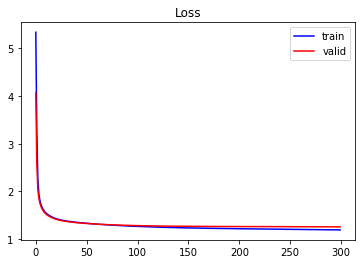

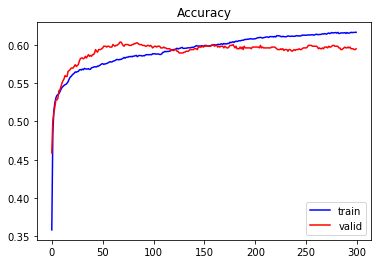

In [153]:
plt.plot(model_history.history['loss'], 'b', label='train')
plt.plot(model_history.history['val_loss'], 'r', label='valid')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(model_history.history['acc'], 'b', label='train')
plt.plot(model_history.history['val_acc'], 'r', label='valid')
plt.legend(loc=4)
plt.title('Accuracy')
plt.show()

In [118]:
y_pred = model.predict(pkgo_test)
print(y_pred[:10,:])

[[3.71923728e-04 1.04923874e-01 8.86087120e-01 6.91086380e-03
  7.53722561e-04 9.52504284e-04]
 [6.12196454e-04 6.64108515e-01 1.61445379e-01 1.69259176e-01
  4.55195969e-03 2.27950077e-05]
 [7.99209103e-02 1.33552790e-01 7.67150894e-02 8.88838321e-02
  1.85343847e-01 4.35583591e-01]
 [1.09250343e-03 3.33938226e-02 3.28708179e-02 8.90355289e-01
  4.20291685e-02 2.58359622e-04]
 [3.19526345e-02 9.67558101e-02 3.35172743e-01 1.51789598e-02
  1.36644552e-02 5.07275403e-01]
 [2.08709911e-02 1.17264949e-01 9.09332186e-02 4.03974771e-01
  3.17434072e-01 4.95220013e-02]
 [8.68565170e-04 1.64119974e-01 8.16210866e-01 1.53585514e-02
  1.93004461e-03 1.51193328e-03]
 [1.81737438e-01 9.35271010e-02 2.18471531e-02 3.66776846e-02
  1.67737052e-01 4.98473614e-01]
 [1.50401366e-03 6.03747889e-02 9.08045590e-01 1.88577489e-03
  6.80999365e-04 2.75088679e-02]
 [6.19395077e-03 4.34197225e-02 3.56821157e-02 6.29962087e-01
  2.75229901e-01 9.51218326e-03]]


In [119]:
y_label = np.argmax(y_pred, axis=1) # 取機率值最高的類別當作預測結果
print(y_label[:10])

[2 1 5 3 5 3 2 5 2 3]


In [120]:
test=pd.read_csv('./test.csv')

In [322]:
pkgo_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,...,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315
7160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000076,1.0,0.0,1.0,0.0,1.0,1.0,0.538939,0.719962,1.0,0.000027,1.0,1.0,1.0,1.0,1.0,1.0,0.157344,0.573203,0.0,1.0,0.329670,1.0,0.047924,0.351633,0.803857,-0.594823
7161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000054,1.0,0.0,1.0,1.0,1.0,1.0,-0.215812,-1.110159,1.0,0.000360,1.0,0.0,1.0,1.0,1.0,1.0,0.418839,0.339323,0.0,1.0,0.379121,1.0,0.231605,0.107714,0.625923,0.779884
7162,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000105,1.0,0.0,1.0,0.0,1.0,1.0,0.200299,-0.499479,0.0,0.000025,1.0,1.0,1.0,1.0,1.0,1.0,0.117215,0.534355,1.0,0.0,0.692308,0.0,0.163014,0.003475,0.021815,0.999762
7163,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000033,1.0,0.0,1.0,1.0,1.0,1.0,0.870347,0.526509,1.0,0.000169,1.0,1.0,1.0,1.0,1.0,1.0,0.188621,0.732558,0.0,1.0,0.376374,1.0,0.051131,0.318277,0.909961,-0.414693
7164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [121]:
submission = pd.DataFrame()
submission['ID'] = test.id
submission['class'] = y_label
submission

,ID,class
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,2
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,1
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,5
3,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,3
4,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,5
...,...,...
1786,MTA5MTg5MTI0Mjc0NDU0NDY3ODE=,5
1787,MTgzODA5ODc2NDU1MDkxOTM4ODU=,5
1788,NzA4MTU3NDkyMzYwMzM2NzA2OQ==,1
1789,MjM5NzA0NzA4Nzc5MTUxNDcxNw==,4


In [122]:
submission.to_csv('submission.csv',index=False)